### 聚类算法 K-means  Hierarchical

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('F:/ml-data/NBA/all_seasons.csv', index_col=0)

In [4]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [5]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078
std,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000
50%,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000
75%,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11145 entries, 0 to 11144
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111

In [7]:
df2 = df.drop(['team_abbreviation', 'college','country','draft_year','draft_round','draft_number','season'], axis=1)

In [8]:
df2.head()

,player_name,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Dennis Rodman,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,Dwayne Schintzius,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,Earl Cureton,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,Ed O'Bannon,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,Ed Pinckney,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040


In [9]:
df2.shape

(11145, 14)

### 数据展示

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

e:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)


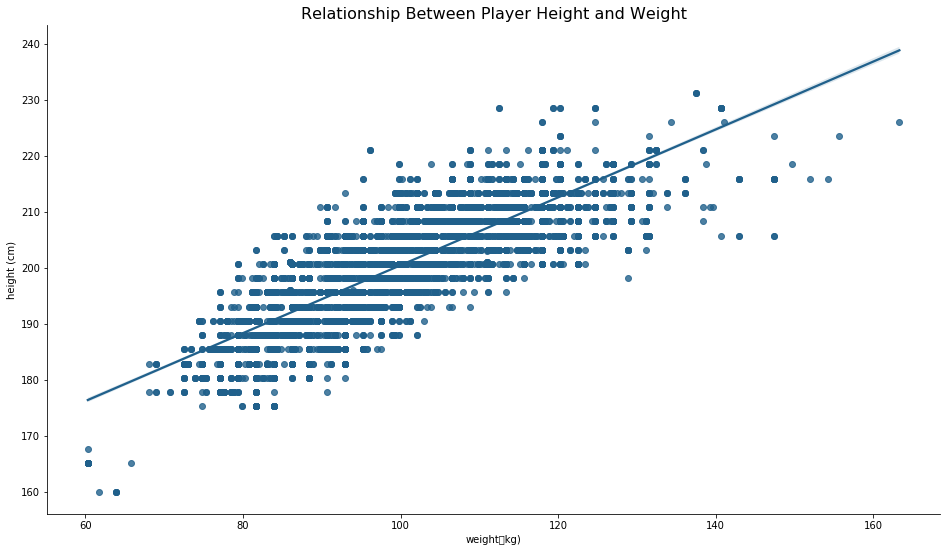

In [17]:
plt.figure(figsize=(16, 9))
sns.regplot(x = 'player_weight', y = 'player_height', data = df2, color='#20608b')
plt.title('Relationship Between Player Height and Weight', fontsize = 16)
plt.xlabel('weight（kg)')
plt.ylabel('height (cm)')
sns.despine()
plt.show()


### PCA and standardization

In [18]:
df3 = df2.drop(['player_name'], axis=1)

In [25]:
x = df3.values
x.shape

(11145, 13)

In [23]:
from sklearn.preprocessing import StandardScaler

In [26]:
x = StandardScaler().fit_transform(x)

In [21]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)  # 保留2个维度
pca_x = pca.fit_transform(x)
pca_x

array([[ 2.8910112 , -3.09388003],
       [ 2.30119625,  1.35580499],
       [ 0.80293414,  2.72586616],
       ...,
       [ 2.06840913, -0.63364319],
       [ 2.27547655,  1.38569458],
       [-0.85411394,  1.42303404]])

In [29]:
pca_x_df = pd.DataFrame(data = pca_x, columns=['component1', 'component2'])
pca_x_df.head()

,component1,component2
0,2.891011,-3.093880
1,2.301196,1.355805
2,0.802934,2.725866
3,0.737690,1.179444
4,2.171004,1.127982


In [30]:
pc1 = pca_x_df['component1']
pc2 = pca_x_df['component2']

<Figure size 432x288 with 0 Axes>

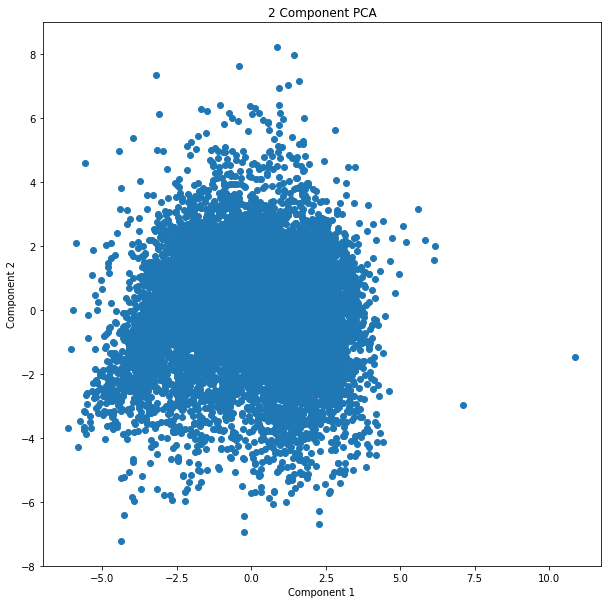

In [31]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(pc1, pc2) #c = y_kmeans, s=10)

### k-means 

In [32]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=1)
y_kmeans = kmeans.fit_predict(pca_x)

In [36]:
len(y_kmeans)

11145

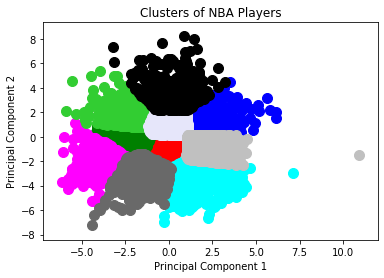

In [40]:
plt.scatter(pca_x[y_kmeans == 0, 0], pca_x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(pca_x[y_kmeans == 1, 0], pca_x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(pca_x[y_kmeans == 2, 0], pca_x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(pca_x[y_kmeans == 3, 0], pca_x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(pca_x[y_kmeans == 4, 0], pca_x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(pca_x[y_kmeans == 5, 0], pca_x[y_kmeans == 5, 1], s = 100, c = 'limegreen', label = 'cluster 6')
plt.scatter(pca_x[y_kmeans == 6, 0], pca_x[y_kmeans == 6, 1], s = 100, c = 'lavender', label = 'cluster 7')
plt.scatter(pca_x[y_kmeans == 7, 0], pca_x[y_kmeans == 7, 1], s = 100, c = 'black', label = 'cluster 8')
plt.scatter(pca_x[y_kmeans == 8, 0], pca_x[y_kmeans == 8, 1], s = 100, c = 'dimgray', label = 'cluster 9')
plt.scatter(pca_x[y_kmeans == 9, 0], pca_x[y_kmeans == 9, 1], s = 100, c = 'silver', label = 'cluster 10')
plt.title('Clusters of NBA Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Hierarchical Clustering

In [41]:
import scipy.cluster.hierarchy as sch 

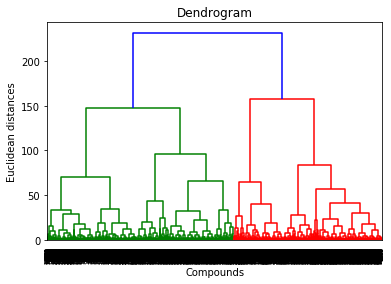

In [42]:
dendrogram = sch.dendrogram(sch.linkage(pca_x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Compounds')
plt.ylabel('Euclidean distances')
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [44]:
agg_cluster = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')
y_agg_cluster = agg_cluster.fit_predict(pca_x)

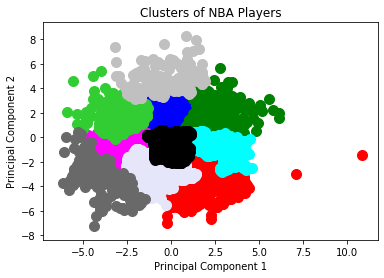

In [45]:
plt.scatter(pca_x[y_agg_cluster == 0, 0], pca_x[y_agg_cluster == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(pca_x[y_agg_cluster == 1, 0], pca_x[y_agg_cluster == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(pca_x[y_agg_cluster == 2, 0], pca_x[y_agg_cluster == 2, 1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(pca_x[y_agg_cluster == 3, 0], pca_x[y_agg_cluster == 3, 1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(pca_x[y_agg_cluster == 4, 0], pca_x[y_agg_cluster == 4, 1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(pca_x[y_agg_cluster == 5, 0], pca_x[y_agg_cluster == 5, 1], s = 100, c = 'limegreen', label = 'cluster 6')
plt.scatter(pca_x[y_agg_cluster == 6, 0], pca_x[y_agg_cluster == 6, 1], s = 100, c = 'lavender', label = 'cluster 7')
plt.scatter(pca_x[y_agg_cluster == 7, 0], pca_x[y_agg_cluster == 7, 1], s = 100, c = 'black', label = 'cluster 8')
plt.scatter(pca_x[y_agg_cluster == 8, 0], pca_x[y_agg_cluster == 8, 1], s = 100, c = 'dimgray', label = 'cluster 9')
plt.scatter(pca_x[y_agg_cluster == 9, 0], pca_x[y_agg_cluster == 9, 1], s = 100, c = 'silver', label = 'cluster 10')
plt.title('Clusters of NBA Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()